# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

def line():
    print('----------------------------------------------')

In [3]:
display(query_1)
line()
display(query_3)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


----------------------------------------------


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [4]:
query_1.info()
line()
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Комментарий: типы данных соответствуют

In [5]:
# Топ 10 городов

top_10_city = query_3.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop = True)
display(top_10_city)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


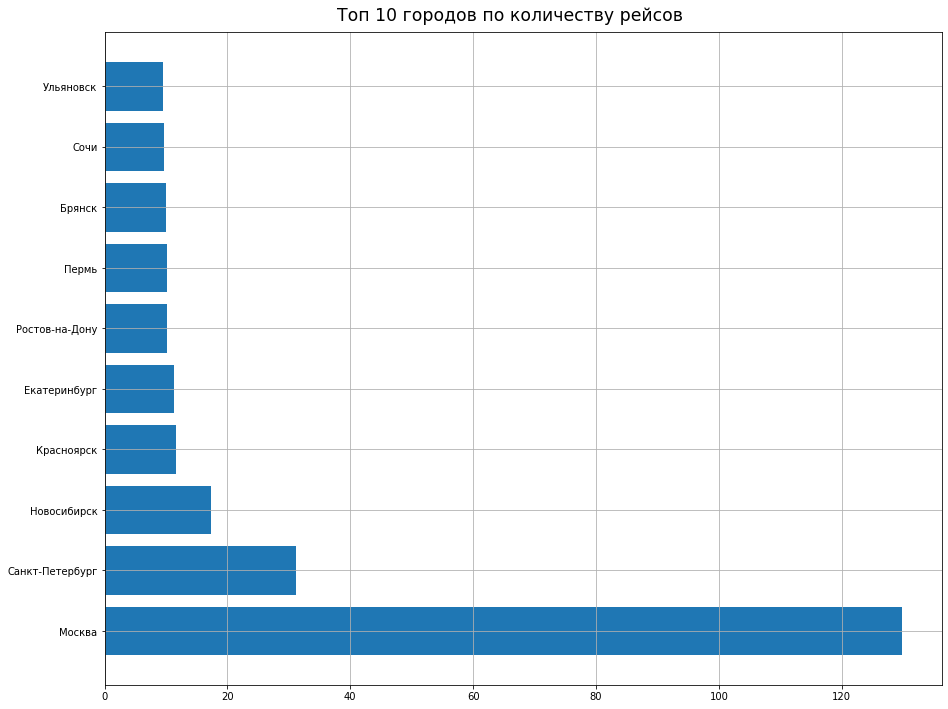

In [6]:
fig, ax = plt.subplots(figsize = (15, 12))
plt.suptitle('Топ 10 городов по количеству рейсов', x=0.5, y=0.91, ha='center', fontsize='xx-large')

ax.barh(top_10_city.index, top_10_city['average_flights'])
ax.grid()
plt.yticks(top_10_city.index, top_10_city['city'])
plt.show()

Комметнарий: Городом с самым большим количеством рейсов является Москва. Причина достаточно проста, это большое население города, а соответственно и большое количество полетов в отличие от других городов. Также полеты в другие страны осуществляются по принципу: Мой город -> Москва -> Лечу в турцию.
Санкт - Петербург думаю уступает по причине того, что он не является промежуточной точкой отправления.

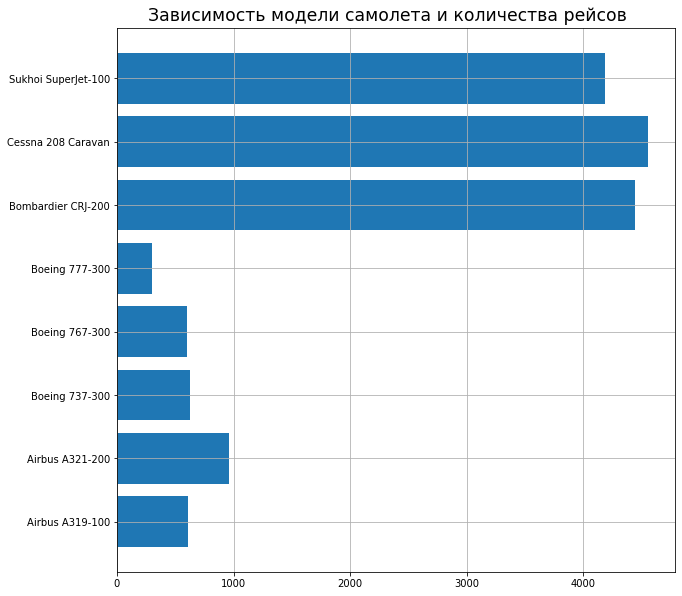

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.suptitle('Зависимость модели самолета и количества рейсов', x=0.5, y=0.91, ha='center', fontsize='xx-large')

ax.barh(query_1.index, query_1['flights_amount'])
ax.grid()
plt.yticks(query_1.index, query_1['model'])
plt.show()

<b>Комментарий:</b>

Предположу, что такие самолеты (от 30 до 100 мест) являются региональными, таким образом совершаются полеты на небольшие расстояния и как следствие гораздо более чаще

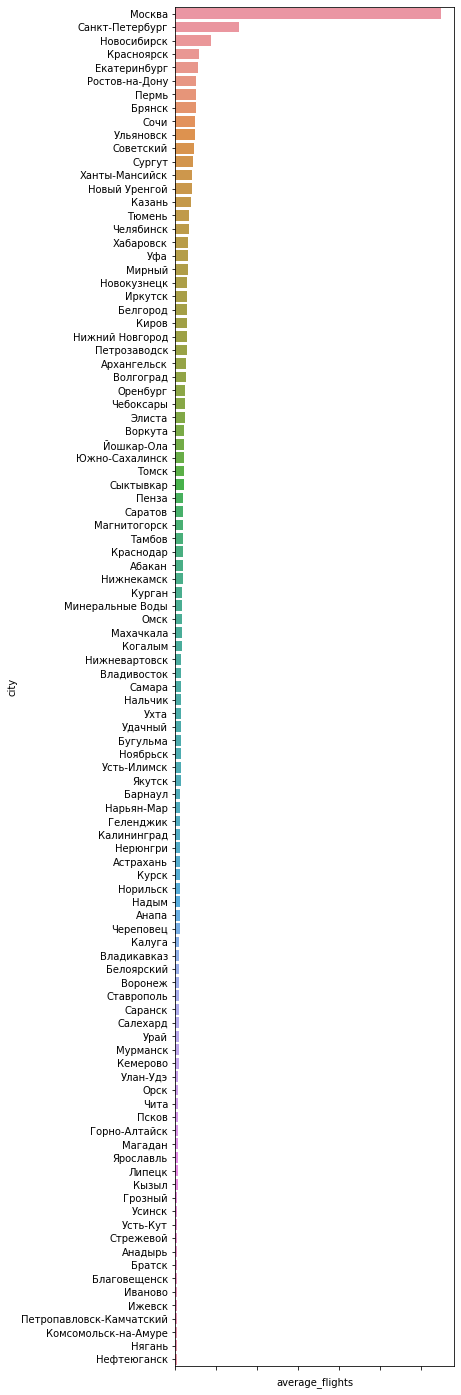

In [8]:
data_query_3_sorted = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(5,25))

ax = sns.barplot(x="average_flights", y="city", data=data_query_3_sorted)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Комментарий: Исходя из данного графика можно наблюдать зависимость: чем больше население тем больше перелетов

Вывод: Исходя из полученных данных можно сказать, что количество полетов зависит от населения города и количества возможностей перелета в другие страны. Количество полетов определенных моделей самолета зависит от того, сколько стран используют данный самолет, когда он был выпущен, для чего он использовался и т.д.